In [1]:
import numpy as np
import pandas as pd
from numpy import arange
import statsmodels.api as sms;
import matplotlib.pyplot as plt
import seaborn as sns

This project will use data provided by fantasydatapros. There are various ways in which fantasy points are calculated (e.g. standard and PPR), but the data provided is standard. Standard offensive scoring is as follows: 
    6 pts per rushing or receiving TD
    6 pts for player returning kick/punt for TD
    6 pts for player returning or recovering a fumble for TD
    4 pts per passing TD
    2 pts per rushing or receiving 2 pt conversion (note: teams do not receive points for yardage gained during the conversion)
    2 pts per passing 2 pt conversion
    1 pt per 10 yards rushing or receiving
    1 pt per 25 yards passing. For kickers, standard scoring is as follows:
    5 pts per 50+ yard FG made
    4 pts per 40-49 yard FG made
    3 pts per FG made, 39 yards or less
    2 pts per rushing, passing, or receiving 2 pt conversion
    1 pt per Extra Point made. Note that in other variations, such as PPR (point per reception) or in leagues where passing TDs are awarded 6 points, the results of this analysis may not apply. 

The first thing we will analyze is draft order. In fantasy football leagues each player is awarded a position in the draft in which he will select a player. In standard scoring, the most common draft order is (RB, RB, WR, WR, ...). I want to see if this common wisdom is supported by the data. The second thing we will analyze is whether or not there are players to start every week regardless of the opposing defense. In other words, which players succeed weekly regardless of the strength of the opposing defense.

### Step 0: Import and Anyalze Data

In [2]:
#Create the path to csv files
path = 'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/'

In [3]:
#Load data from the previous 10 years of NFL fantasy football data

df20 = pd.read_csv(path + '2020.csv')
df19 = pd.read_csv(path + '2019.csv')
df18 = pd.read_csv(path + '2018.csv')
df17 = pd.read_csv(path + '2017.csv')
df16 = pd.read_csv(path + '2016.csv')
df15 = pd.read_csv(path + '2015.csv')
df14 = pd.read_csv(path + '2014.csv')
df13 = pd.read_csv(path + '2013.csv')
df12 = pd.read_csv(path + '2012.csv')
df11 = pd.read_csv(path + '2011.csv')

In [4]:
print(df20.shape)
df20.head()

(626, 20)


,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1


In [5]:
# Search for null values

unknown_position20 = df20['Pos'].isnull().sum()

if unknown_position20 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position20))

df20[df20['Pos'].isnull()]

There are 48 players with no position listed.


,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
74,Derek Watt,PIT,NaN,28,12,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0
75,Johnny Stanton,CLE,NaN,26,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0
564,Antony Auclair,TAM,NaN,27,8,2,1,0,0,0,0,0,0,0,0,0,NaN,0,0,0
566,Jeff Badet,WAS,NaN,26,3,0,1,0,0,0,0,0,0,0,0,0,NaN,0,0,0
567,Kenjon Barner,TAM,NaN,31,6,0,1,0,0,0,0,0,0,0,0,0,NaN,0,0,0
569,Evan Baylis,ARI,NaN,27,5,1,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0
570,Andrew Beck,DEN,NaN,24,10,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0
572,Fred Brown,DEN,NaN,27,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0
573,Deante Burton,DAL,NaN,26,4,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0
574,Hakeem Butler,PHI,NaN,24,2,0,1,0,0,0,0,0,0,0,0,0,NaN,0,0,0


In [6]:
print(df19.shape)
df19.head()

(620, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,142.0,116.0,0.0,...,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20,0.0,1.0,0.0
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,...,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,24.0,18.0,0.0,...,0.0,1540.0,16.0,303.0,206.0,2.0,294.60,0.0,5.0,3.0
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,68.0,49.0,0.0,...,0.0,1084.0,16.0,236.0,474.0,3.0,314.80,0.0,3.0,2.0
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,71.0,54.0,0.0,...,0.0,1357.0,12.0,301.0,420.0,2.0,311.70,0.0,3.0,2.0


In [7]:
# Search for null values

unknown_position19 = df19['Pos'].isnull().sum()

if unknown_position19 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position19))

df19[df19['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [8]:
print(df18.shape)
df18.head()

(622, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,Todd Gurley,LAR,RB,24.0,14.0,14.0,81.0,59.0,0.0,...,0.0,1251.0,17.0,256.0,580.0,4.0,366.10,0.0,1.0,1.0
1,1,Saquon Barkley,NYG,RB,21.0,16.0,16.0,121.0,91.0,0.0,...,0.0,1307.0,11.0,261.0,721.0,4.0,383.80,0.0,0.0,0.0
2,2,Christian McCaffrey,CAR,RB,22.0,16.0,16.0,124.0,107.0,50.0,...,1.0,1098.0,7.0,219.0,867.0,6.0,385.50,0.0,4.0,1.0
3,3,Alvin Kamara,NOR,RB,23.0,15.0,13.0,105.0,81.0,0.0,...,0.0,883.0,14.0,194.0,709.0,4.0,348.20,0.0,1.0,0.0
4,4,Patrick Mahomes,KAN,QB,23.0,16.0,16.0,0.0,0.0,5097.0,...,580.0,272.0,2.0,60.0,0.0,0.0,415.08,12.0,9.0,2.0


In [9]:
# Search for null values

unknown_position18 = df18['Pos'].isnull().sum()

if unknown_position18 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position18))

df18[df18['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [10]:
print(df17.shape)
df17.head()

(571, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,Todd Gurley,LAR,RB,23.0,15.0,15.0,87.0,64.0,0.0,...,0.0,1305.0,13.0,279.0,788.0,6.0,383.3,0.0,5.0,2.0
1,1,Le'Veon Bell,PIT,RB,25.0,15.0,15.0,106.0,85.0,0.0,...,0.0,1291.0,9.0,321.0,655.0,2.0,341.6,0.0,3.0,2.0
2,2,Kareem Hunt,KAN,RB,22.0,16.0,16.0,63.0,53.0,0.0,...,0.0,1327.0,8.0,272.0,455.0,3.0,295.2,0.0,1.0,1.0
3,3,Alvin Kamara,NOR,RB,22.0,16.0,3.0,100.0,81.0,0.0,...,0.0,728.0,8.0,120.0,826.0,5.0,312.4,0.0,1.0,1.0
4,4,Melvin Gordon,LAC,RB,24.0,16.0,16.0,83.0,58.0,0.0,...,0.0,1105.0,8.0,284.0,476.0,4.0,288.1,0.0,1.0,0.0


In [11]:
# Search for null values

unknown_position17 = df17['Pos'].isnull().sum()

if unknown_position17 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position17))

df17[df17['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [12]:
print(df16.shape)
df16.head()

(584, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,David Johnson,ARI,RB,25.0,16.0,16.0,120.0,80.0,0.0,...,0.0,1239.0,16.0,293.0,879.0,4.0,405.80,0.0,5.0,3.0
1,1,Ezekiel Elliott,DAL,RB,21.0,15.0,15.0,39.0,32.0,0.0,...,0.0,1631.0,15.0,322.0,363.0,1.0,325.40,0.0,5.0,1.0
2,2,LeSean McCoy,BUF,RB,28.0,15.0,15.0,57.0,50.0,0.0,...,0.0,1267.0,13.0,234.0,356.0,1.0,296.30,0.0,3.0,0.0
3,3,Aaron Rodgers,GNB,QB,33.0,16.0,16.0,0.0,0.0,4428.0,...,610.0,369.0,4.0,67.0,0.0,0.0,376.02,7.0,8.0,4.0
4,4,DeMarco Murray,TEN,RB,28.0,16.0,16.0,67.0,53.0,10.0,...,2.0,1287.0,9.0,293.0,377.0,3.0,293.80,0.0,3.0,1.0


In [13]:
# Search for null values

unknown_position16 = df16['Pos'].isnull().sum()

if unknown_position16 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position16))

df16[df16['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [14]:
print(df15.shape)
df15.head()

(595, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,Antonio Brown,PIT,WR,27.0,16.0,16.0,193.0,136.0,0.0,...,0.0,28.0,0.0,3.0,1834.0,10.0,378.20,0.0,3.0,2.0
1,1,Devonta Freeman,ATL,RB,23.0,15.0,13.0,97.0,73.0,0.0,...,0.0,1056.0,11.0,265.0,578.0,3.0,316.40,0.0,3.0,2.0
2,2,Julio Jones,ATL,WR,26.0,16.0,16.0,203.0,136.0,0.0,...,0.0,0.0,0.0,0.0,1871.0,8.0,369.10,0.0,3.0,1.0
3,3,Adrian Peterson,MIN,RB,30.0,16.0,16.0,36.0,30.0,0.0,...,0.0,1485.0,11.0,327.0,222.0,0.0,260.70,0.0,7.0,3.0
4,4,Cam Newton,CAR,QB,26.0,16.0,16.0,0.0,0.0,3837.0,...,495.0,636.0,10.0,132.0,0.0,0.0,389.08,10.0,5.0,4.0


In [15]:
# Search for null values

unknown_position15 = df15['Pos'].isnull().sum()

if unknown_position15 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position15))

df15[df15['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [16]:
print(df14.shape)
df14.head()

(725, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,DeMarco Murray,DAL,RB,26.0,16.0,16.0,64.0,57.0,0.0,...,0.0,1845.0,13.0,392.0,416.0,0.0,351.1,0.0,6.0,5.0
1,1,Le'Veon Bell,PIT,RB,22.0,16.0,16.0,105.0,83.0,0.0,...,0.0,1361.0,8.0,290.0,854.0,3.0,370.5,0.0,0.0,0.0
2,2,Marshawn Lynch,SEA,RB,28.0,16.0,14.0,48.0,37.0,0.0,...,0.0,1306.0,13.0,280.0,367.0,4.0,302.3,0.0,4.0,2.0
3,3,Antonio Brown,PIT,WR,26.0,16.0,16.0,181.0,129.0,20.0,...,2.0,13.0,0.0,4.0,1698.0,13.0,378.9,0.0,2.0,2.0
4,4,Matt Forte,CHI,RB,29.0,16.0,16.0,130.0,102.0,0.0,...,0.0,1038.0,6.0,266.0,808.0,4.0,342.6,0.0,2.0,2.0


In [17]:
# Search for null values

unknown_position14 = df14['Pos'].isnull().sum()

if unknown_position14 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position14))

df14[df14['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [18]:
print(df13.shape)
df13.head()

(584, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,Jamaal Charles,KAN,RB,27.0,15.0,15.0,104.0,70.0,0.0,...,0.0,1287.0,12.0,259.0,693.0,7.0,378.00,0.0,4.0,2.0
1,1,Peyton Manning,DEN,QB,37.0,16.0,16.0,0.0,0.0,5477.0,...,659.0,-31.0,1.0,32.0,0.0,0.0,409.98,10.0,11.0,6.0
2,2,LeSean McCoy,PHI,RB,25.0,16.0,16.0,64.0,52.0,0.0,...,0.0,1607.0,9.0,314.0,539.0,2.0,330.60,0.0,1.0,1.0
3,3,Matt Forte,CHI,RB,28.0,16.0,16.0,95.0,74.0,0.0,...,0.0,1339.0,9.0,289.0,594.0,3.0,335.30,0.0,2.0,2.0
4,4,Marshawn Lynch,SEA,RB,27.0,16.0,16.0,44.0,36.0,0.0,...,0.0,1257.0,12.0,301.0,316.0,2.0,275.30,0.0,4.0,1.0


In [19]:
# Search for null values

unknown_position13 = df13['Pos'].isnull().sum()

if unknown_position13 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position13))

df13[df13['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [20]:
print(df12.shape)
df12.head()

(688, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,Adrian Peterson,MIN,RB,27.0,16.0,16.0,51.0,40.0,0.0,...,0.0,2097.0,12.0,348.0,217.0,1.0,345.4,0.0,4.0,2.0
1,1,Doug Martin,TAM,RB,23.0,16.0,16.0,70.0,49.0,0.0,...,0.0,1454.0,11.0,319.0,472.0,1.0,311.6,0.0,1.0,1.0
2,2,Arian Foster,HOU,RB,26.0,16.0,16.0,58.0,40.0,0.0,...,0.0,1424.0,15.0,351.0,217.0,2.0,302.1,0.0,3.0,2.0
3,3,Marshawn Lynch,SEA,RB,26.0,16.0,15.0,30.0,23.0,0.0,...,0.0,1590.0,11.0,315.0,196.0,1.0,269.6,0.0,5.0,2.0
4,4,Alfred Morris,WAS,RB,24.0,16.0,16.0,16.0,11.0,0.0,...,0.0,1613.0,13.0,335.0,77.0,0.0,252.0,0.0,4.0,3.0


In [21]:
# Search for null values

unknown_position12 = df12['Pos'].isnull().sum()

if unknown_position12 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position12))

df12[df12['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [22]:
print(df11.shape)
df11.head()

(585, 21)


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,Aaron Rodgers,GNB,QB,28.0,15.0,15.0,0.0,0.0,4643.0,...,502.0,257.0,3.0,60.0,0.0,0.0,397.42,6.0,5.0,0.0
1,1,Drew Brees,NOR,QB,32.0,16.0,16.0,0.0,0.0,5476.0,...,657.0,86.0,1.0,21.0,0.0,0.0,387.64,14.0,1.0,1.0
2,2,Ray Rice,BAL,RB,24.0,16.0,16.0,104.0,76.0,1.0,...,1.0,1364.0,12.0,291.0,704.0,3.0,372.84,0.0,2.0,2.0
3,3,Calvin Johnson,DET,WR,26.0,16.0,16.0,158.0,96.0,0.0,...,0.0,11.0,0.0,1.0,1681.0,16.0,359.20,0.0,1.0,1.0
4,4,Cam Newton,CAR,QB,22.0,16.0,16.0,1.0,1.0,4051.0,...,517.0,706.0,14.0,126.0,27.0,0.0,366.34,17.0,5.0,2.0


In [23]:
# Search for null values

unknown_position11 = df11['Pos'].isnull().sum()

if unknown_position11 == 0:
    print("No missing player position")
else:
    print("There are {} players with no position listed.".format(unknown_position11))

df11[df11['Pos'].isnull()]

No missing player position


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost


In [24]:
# The year 2020 has 48 unknown players and 56 uknown fantasy points. Other years had some missing fantasy points as well.
# We can see these players did not play in any game, thus we can drop them.

df20 = df20.dropna(subset=['Pos','FantasyPoints'], how='any')
df19 = df19.dropna(subset=['Pos','FantasyPoints'], how='any')
df18 = df18.dropna(subset=['Pos','FantasyPoints'], how='any')
df17 = df17.dropna(subset=['Pos','FantasyPoints'], how='any')
df16 = df16.dropna(subset=['Pos','FantasyPoints'], how='any')
df15 = df15.dropna(subset=['Pos','FantasyPoints'], how='any')
df14 = df14.dropna(subset=['Pos','FantasyPoints'], how='any')
df13 = df13.dropna(subset=['Pos','FantasyPoints'], how='any')
df12 = df12.dropna(subset=['Pos','FantasyPoints'], how='any')
df11 = df11.dropna(subset=['Pos','FantasyPoints'], how='any')

In [25]:
#Every year but 2020 has an "Unnamed 0" column. Remove this column for years 2011-2019

df19 = df19.drop(columns='Unnamed: 0')
df18 = df18.drop(columns='Unnamed: 0')
df17 = df17.drop(columns='Unnamed: 0')
df16 = df16.drop(columns='Unnamed: 0')
df15 = df15.drop(columns='Unnamed: 0')
df14 = df14.drop(columns='Unnamed: 0')
df13 = df13.drop(columns='Unnamed: 0')
df12 = df12.drop(columns='Unnamed: 0')
df11 = df11.drop(columns='Unnamed: 0')

In [26]:
# Create dataframes for only the player, position, total fantasy points and games played

df20fp = df20[['Player', 'Pos', 'FantasyPoints', 'G']]
df19fp = df19[['Player', 'Pos', 'FantasyPoints', 'G']]
df18fp = df18[['Player', 'Pos', 'FantasyPoints', 'G']]
df17fp = df17[['Player', 'Pos', 'FantasyPoints', 'G']]
df16fp = df16[['Player', 'Pos', 'FantasyPoints', 'G']]
df15fp = df15[['Player', 'Pos', 'FantasyPoints', 'G']]
df14fp = df14[['Player', 'Pos', 'FantasyPoints', 'G']]
df13fp = df13[['Player', 'Pos', 'FantasyPoints', 'G']]
df12fp = df12[['Player', 'Pos', 'FantasyPoints', 'G']]
df11fp = df11[['Player', 'Pos', 'FantasyPoints', 'G']]

## Step 1: Analyze 2020

First we will look at the year 2020. The values have been sorted by total fantasy points and grouped by position. As we can see, the average points per position is dominated by quarterbacks. The difference between running back and wide receiver is slight, followed by the tight end position in last. Based on this information, can we conclude that the quarterback is the most imporant player on any given fantasy football team? While the quarterback will most likely score any fantasy player the most points, we need to look more closely at how each player from each position differs from the mean.

In [27]:
df20fp.describe()

,FantasyPoints,G
count,569.000000,569.000000
mean,61.947276,11.254833
std,74.147579,4.782238
min,-3.000000,1.000000
25%,9.000000,8.000000
50%,33.000000,13.000000
75%,91.000000,16.000000
max,395.000000,16.000000


In [28]:
#Sort by fantasy points for only the year 2020

df20fp = df20fp.sort_values(by='FantasyPoints', ascending=False)
df20fp.head(10)

,Player,Pos,FantasyPoints,G
6,Josh Allen,QB,395.0,16
7,Aaron Rodgers,QB,382.0,16
8,Kyler Murray,QB,379.0,16
9,Patrick Mahomes,QB,374.0,15
10,Deshaun Watson,QB,369.0,16
15,Russell Wilson,QB,360.0,16
22,Ryan Tannehill,QB,343.0,16
24,Tom Brady,QB,338.0,16
29,Lamar Jackson,QB,333.0,15
28,Justin Herbert,QB,333.0,15


In [29]:
# Count the total number of players per position for the year 2020

pp20_t = df20fp.groupby(['Pos'])['Pos'].count()
pp20_t.head()

Pos
QB     79
RB    160
TE    111
WR    219
Name: Pos, dtype: int64

Pos
QB    117.886076
RB     60.137500
WR     56.237443
TE     36.009009
Name: FantasyPoints, dtype: float64


<AxesSubplot:title={'center':'Average Points per Position'}, xlabel='Position', ylabel='Average Points'>

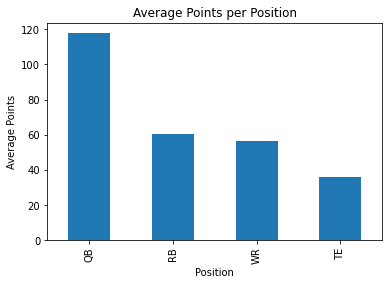

In [30]:
mean20 = df20fp.groupby(['Pos']).mean()['FantasyPoints'].sort_values(ascending=False)
print(mean20)
mean20[:10].plot(kind="bar", title="Average Points per Position", xlabel="Position", ylabel="Average Points")

In [31]:
sd20 = df20fp.groupby(['Pos']).std()['FantasyPoints'].sort_values(ascending=False)
sd20

Pos
QB    128.566254
RB     65.743114
WR     54.821631
TE     38.323146
Name: FantasyPoints, dtype: float64

In [32]:
# Calculate the coefficient of variation

cv20 = sd20 / mean20
cv20

Pos
QB    1.090597
RB    1.093213
WR    0.974824
TE    1.064266
Name: FantasyPoints, dtype: float64

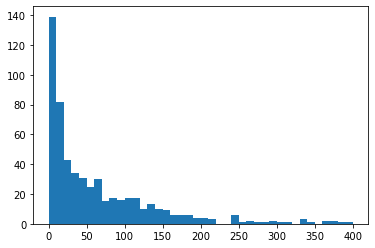

In [33]:
bins = np.arange(0, df20fp['FantasyPoints'].max()+10, 10)
plt.hist(data = df20fp, x = 'FantasyPoints', bins=bins);

Since the distrubution is heavily skewed, it may be better to generate a box plot to better understand the variability of the data.

<AxesSubplot:xlabel='Pos', ylabel='FantasyPoints'>

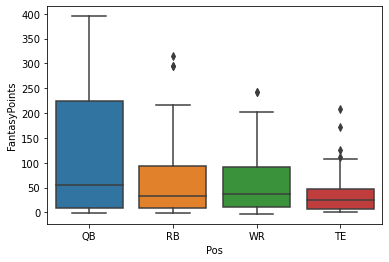

In [34]:
sns.boxplot(x = 'Pos', y = 'FantasyPoints', data=df20fp)

By first looking at the mean and standard deviation of each individual position, there appeared to be not much variation among the positions, even though on average quarterbacks clearly score the most points. However, the above averages are skewed by players that played in relatively few games or relatively few snaps. It is also the case that starting players miss a few games due to injury. Due to this, we have a right-skewed distrubution; it is a relatively few players scoring most of the points. A box plot was generated to better understand the distribution. We can see that the disparity in points scored for the quarterback position is much greater than the other positions. However, there are also no outliers. Running backs and wide receivers do not show as much variability as quarterbacks, but there are a few outliers dominating the position. There are even more outliers with the tight end position. 75% of all tight ends will get a player roughtly the same number of points and since tight ends score less points than the other positions, this suggests only a few outliers worth drafting early. 

NFL teams typcally have 4 running backs, 2 quarterbacks, 6 wide recievers and 3 tight ends on the starting roster. Where as wide recievers, running backs and tight ends share snaps throughout the game, it is very rarely the case with the quarterback. The quarterback will typically take every offensive snap. This isn't the case for the other offensive positions, although teams usually have a primary running back who will take the majority of offensive snaps. Considering we are focusing on draft picks prior to the start of the season, it is safe to assume we want to focus on starting players. Now many players do not play every game due to injury, so based on the available data, how can we determine starting players? Again, a starting non-quarterback may only get 1 or 2 snaps a game, but a starting quarterback will get every offensive snap. By focusing on starting quarterbacks we can get a better understanding of the mean points scored by playing quarterbacks. According to http://www.profootballlogic.com/, on average, players will miss 3.1 games due to injury per season. This will be used as the baseline to determine a starting player.

Pos
QB     26
RB     91
TE     79
WR    136
Name: Pos, dtype: int64
Pos
QB    278.153846
RB     85.560440
WR     77.985294
TE     44.240506
Name: FantasyPoints, dtype: float64


<AxesSubplot:title={'center':'Average Points per Position'}, xlabel='Position', ylabel='Average Points'>

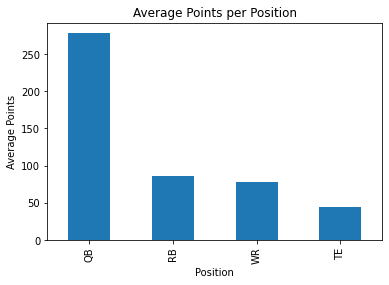

In [35]:
new = df20fp[df20fp['G'] > 11]
new_mean20 = new.groupby(['Pos']).mean()['FantasyPoints'].sort_values(ascending=False)
print(new.groupby(['Pos'])['Pos'].count())
print(new_mean20)
new_mean20[:10].plot(kind="bar", title="Average Points per Position", xlabel="Position", ylabel="Average Points")

By focusing only on starting players, we have elimited many players who do not play and thus would never be drafted at the start of the season (QB: 79 to 26, RB 160 to 91, TE: 111 to 79, WR: 219 to 136). The relative means of RB, WR, and TE are simular compared to the drastic increase in the quarterback position. This makes sense since usually only one quarterback per team plays.

In [36]:
new_sd20 = new.groupby(['Pos']).std()['FantasyPoints'].sort_values(ascending=False)
new_sd20

Pos
QB    79.843693
RB    74.011292
WR    56.833348
TE    40.984742
Name: FantasyPoints, dtype: float64

In [37]:
# Calculate the new coefficient of variation

new_cv20 = new_sd20 / new_mean20
new_cv20

Pos
QB    0.287049
RB    0.865018
WR    0.728770
TE    0.926408
Name: FantasyPoints, dtype: float64

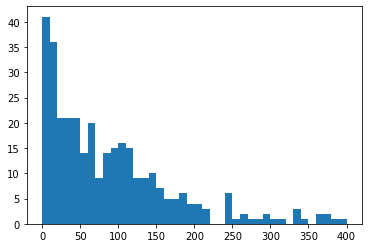

In [38]:
bins = np.arange(0, new['FantasyPoints'].max()+10, 10)
plt.hist(data = new, x = 'FantasyPoints', bins=bins);

<AxesSubplot:xlabel='Pos', ylabel='FantasyPoints'>

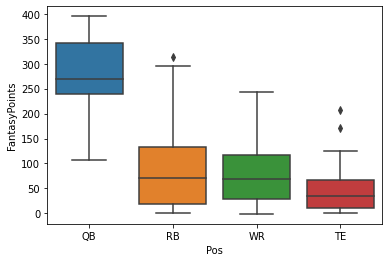

In [39]:
sns.boxplot(x = 'Pos', y = 'FantasyPoints', data=new)

When we focus on starting players we can see that disparity among quarterbacks has reduced consideribly. The bottom 25% of quarterbacks will still score 100-240 points a season. 75% of starting running backs will score 0-140 points a season with a much bigger disparity among the top 25%. This suggests that drafting a top running back is more important than drafting a top quarterback. With the tight end position, there are currently two players worth considering early.

## Step 2: Combine 10 Years of Data

In [40]:
df20fp = df20fp.rename(columns = {"FantasyPoints": "FP20"})
df19fp = df19fp.rename(columns = {"FantasyPoints": "FP19"})
df18fp = df18fp.rename(columns = {"FantasyPoints": "FP18"})
df17fp = df17fp.rename(columns = {"FantasyPoints": "FP17"})
df16fp = df16fp.rename(columns = {"FantasyPoints": "FP16"})
df15fp = df15fp.rename(columns = {"FantasyPoints": "FP15"})
df14fp = df14fp.rename(columns = {"FantasyPoints": "FP14"})
df13fp = df13fp.rename(columns = {"FantasyPoints": "FP13"})
df12fp = df12fp.rename(columns = {"FantasyPoints": "FP12"})
df11fp = df11fp.rename(columns = {"FantasyPoints": "FP11"})

df20fp = df20fp.rename(columns = {"G": "G20"})
df19fp = df19fp.rename(columns = {"G": "G19"})
df18fp = df18fp.rename(columns = {"G": "G18"})
df17fp = df17fp.rename(columns = {"G": "G17"})
df16fp = df16fp.rename(columns = {"G": "G16"})
df15fp = df15fp.rename(columns = {"G": "G15"})
df14fp = df14fp.rename(columns = {"G": "G14"})
df13fp = df13fp.rename(columns = {"G": "G13"})
df12fp = df12fp.rename(columns = {"G": "G12"})
df11fp = df11fp.rename(columns = {"G": "G11"})

In [41]:
# Merge the previous 10 years

df = df20fp.merge(df19fp.loc[:, df19fp.columns != 'Pos'], on='Player', how='left')
df = df.merge(df18fp.loc[:, df18fp.columns != 'Pos'], on='Player', how='left')
df = df.merge(df17fp.loc[:, df17fp.columns != 'Pos'], on='Player', how='left')
df = df.merge(df16fp.loc[:, df16fp.columns != 'Pos'], on='Player', how='left')
df = df.merge(df15fp.loc[:, df15fp.columns != 'Pos'], on='Player', how='left')
df = df.merge(df14fp.loc[:, df14fp.columns != 'Pos'], on='Player', how='left')
df = df.merge(df13fp.loc[:, df13fp.columns != 'Pos'], on='Player', how='left')
df = df.merge(df12fp.loc[:, df12fp.columns != 'Pos'], on='Player', how='left')
df = df.merge(df11fp.loc[:, df11fp.columns != 'Pos'], on='Player', how='left')

In [42]:
# Sum up total games played

df['Total Games'] = df[['G20', 'G19', 'G18', 'G17', 'G16', 'G15', 'G14', 'G13', 'G12', 'G11']].sum(axis=1)

# Not every player has played in all ten years. Find the average number of fantasy points per year for each player

df['FP per Year'] = df[['FP20', 'FP19', 'FP18', 'FP17', 'FP16', 'FP15', 'FP14', 'FP13', 'FP12', 'FP11']].mean(axis=1).round(2)

#Sort by fantasy points

df.sort_values(by='FP per Year', ascending=False)

,Player,Pos,FP20,G20,FP19,G19,FP18,G18,FP17,G17,...,FP14,G14,FP13,G13,FP12,G12,FP11,G11,Total Games,FP per Year
9,Justin Herbert,QB,333.0,15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,333.00
2,Kyler Murray,QB,379.0,16,279.28,16.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,329.14
5,Russell Wilson,QB,360.0,16,326.60,16.0,297.42,16.0,343.92,16.0,...,328.60,16.0,270.18,16.0,275.62,16.0,NaN,NaN,144.0,311.85
28,Drew Brees,QB,209.0,12,224.76,11.0,302.98,15.0,262.56,16.0,...,303.98,16.0,357.68,16.0,345.58,16.0,387.64,16.0,149.0,303.07
1,Aaron Rodgers,QB,382.0,16,272.38,16.0,306.58,16.0,129.60,7.0,...,352.14,16.0,169.44,9.0,342.60,16.0,397.42,15.0,143.0,302.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Temarrick Hemingway,TE,1.0,8,NaN,NaN,0.00,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.33
590,Tyler Bray,QB,1.0,1,NaN,NaN,NaN,NaN,-2.00,1.0,...,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,-0.33
602,Tim Boyle,QB,-1.0,8,-0.10,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,-0.55
604,Adrian Killins,RB,-1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.00


The average points scored by position for the last ten years is simular to the year 2020. It is safe to assume that preceding years will follow a similar pattern. There are 32 NFL teams and thus 32 starting quarterbacks. As we can see only one player out of the top ten highest scoring players is not a quarterback. Most fantasy leagues have 10-14 players. Most players tend to draft at least 2 quarterbacks in case of injury and bye-weeks, so we will assume that there is at least one available starting quarterback per player. Considering that quarterbacks are the most valuable player on the team, does it make sense to prioritize quarterbacks and draft them early? To answer that question, it will help to understand how the points scored by each player in each position deviates the mean points scored of their respective positions. We will also need to adjust for players that have only played a few games as this could skew the averages.

<AxesSubplot:title={'center':'Average Points per Position'}, xlabel='Position', ylabel='Average Points'>

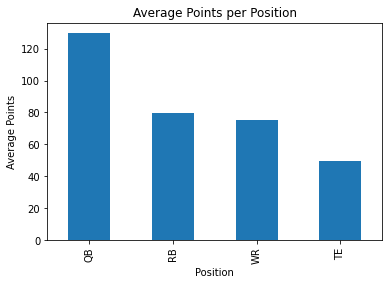

In [43]:
pos_t = df.groupby(['Pos']).mean()['FP per Year'].sort_values(ascending=False)
pos_t[:10].plot(kind="bar", title="Average Points per Position", xlabel="Position", ylabel="Average Points")

In [44]:
# Count the total number of players per position

pplayers_t = df.groupby(['Pos'])['Pos'].count()
pplayers_t.head()

Pos
QB    110
RB    165
TE    114
WR    220
Name: Pos, dtype: int64

In [45]:
new_df = df.sort_values(by='FP per Year', ascending=True)
new_df = new_df[new_df['G20'] > 11]

In [46]:
mean_t = new_df.groupby(['Pos']).mean()['FP per Year'].sort_values(ascending=False)
mean_t

Pos
QB    246.753077
RB     91.767158
WR     89.848905
TE     53.845366
Name: FP per Year, dtype: float64

In [47]:
sd_t = new_df.groupby(['Pos']).std()['FP per Year'].sort_values(ascending=False)
sd_t

Pos
RB    71.785965
WR    65.447416
QB    63.898046
TE    44.693232
Name: FP per Year, dtype: float64

In [48]:
# Calculate the new coefficient of variation
# Calculate the new coefficient of variation

new_t = sd_t / mean_t
new_cv20

Pos
QB    0.287049
RB    0.865018
WR    0.728770
TE    0.926408
Name: FantasyPoints, dtype: float64

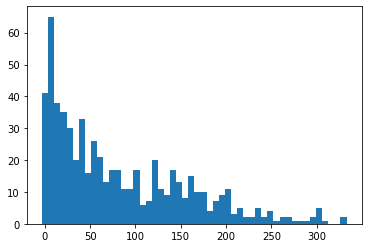

In [49]:
plt.hist(data = df, x = 'FP per Year', bins=50);

<AxesSubplot:xlabel='Pos', ylabel='FP per Year'>

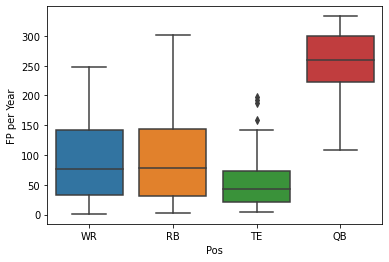

In [50]:
sns.boxplot(x = 'Pos', y = 'FP per Year', data=new_df)

Fantasy points scored for the last ten years shows a simular distribution as the year 2020.

## Step 3: Import Weekly Data for 2019

In [51]:
# Note that defensive data was not available for 2020

week1_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week1.csv')
week2_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week2.csv')
week3_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week3.csv')
week4_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week4.csv')
week5_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week5.csv')
week6_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week6.csv')
week7_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week7.csv')
week8_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week8.csv')
week9_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week9.csv')
week10_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week10.csv')
week11_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week11.csv')
week12_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week12.csv')
week13_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week13.csv')
week14_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week14.csv')
week15_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week15.csv')
week16_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week16.csv')
week17_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week17.csv')


# import defensive ranking data
defense_df = pd.read_csv('https://github.com/fantasydatapros/data/raw/master/defense/2019.csv')

# import schedule to find weekly matchups
path = "C:/Users/josch/OneDrive/Desktop/Udacity/"
schedule_df = pd.read_csv(path + '4for4-teams-schedule-2019-grid-table.csv')

In [52]:
print(week1_df.shape)
week1_df.head()

(296, 19)


,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,33.40,33.40
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,7.10,7.10
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,27.32,27.32
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,14.32,14.32


In [53]:
# We will only focus on the QB, RB, WR and TE positions. We can ignore all other rows.

week1_df['Pos'].unique()

array(['QB', 'WR', 'RB', 'DB/LB', 'HB', 'TE', 'FB', 'WR/RS', 'WR/PR',
       'FB/DL', 'C', 'CB', 'DB'], dtype=object)

In [54]:
# Ignore rows

keep = ['QB', 'RB', 'WR', 'TE']

week1_df = week1_df[week1_df['Pos'].isin(keep)]
week2_df = week2_df[week2_df['Pos'].isin(keep)]
week3_df = week3_df[week3_df['Pos'].isin(keep)]
week4_df = week4_df[week4_df['Pos'].isin(keep)]
week5_df = week5_df[week5_df['Pos'].isin(keep)]
week6_df = week6_df[week6_df['Pos'].isin(keep)]
week7_df = week7_df[week7_df['Pos'].isin(keep)]
week8_df = week8_df[week8_df['Pos'].isin(keep)]
week9_df = week9_df[week9_df['Pos'].isin(keep)]
week10_df = week10_df[week10_df['Pos'].isin(keep)]
week10_df = week11_df[week11_df['Pos'].isin(keep)]
week12_df = week12_df[week12_df['Pos'].isin(keep)]
week13_df = week13_df[week13_df['Pos'].isin(keep)]
week14_df = week14_df[week14_df['Pos'].isin(keep)]
week15_df = week15_df[week15_df['Pos'].isin(keep)]
week16_df = week16_df[week16_df['Pos'].isin(keep)]
week17_df = week17_df[week17_df['Pos'].isin(keep)]

In [55]:
week1_df.shape

(282, 19)

In [56]:
schedule_df.head()

,Team,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18
0,ARI,DET,@BAL,CAR,SEA,@CIN,ATL,@NYG,@NO,SF,@TB,@SF,BYE,LAR,PIT,CLE,@SEA,@LAR,NaN
1,ATL,@MIN,PHI,@IND,TEN,@HOU,@ARI,LAR,SEA,BYE,@NO,@CAR,TB,NO,CAR,@SF,JAX,@TB,NaN
2,BAL,@MIA,ARI,@KC,CLE,@PIT,CIN,@SEA,BYE,NE,@CIN,HOU,@LAR,SF,@BUF,NYJ,@CLE,PIT,BYE
3,BUF,@NYJ,@NYG,CIN,NE,@TEN,BYE,MIA,PHI,WAS,@CLE,@MIA,DEN,@DAL,BAL,@PIT,@NE,NYJ,@HOU
4,CAR,LAR,TB,@ARI,@HOU,JAX,@TB,BYE,@SF,TEN,@GB,ATL,@NO,WAS,@ATL,SEA,@IND,NO,NaN


In [57]:
# Some of the team abbreviations do not match. Change KAN to KC, NWE to NE, OAK to LV, NOR to NO, GNB to GB, SFO to SF, 
# and TAM to TB

old_tm = np.setdiff1d(week1_df['Tm'].unique(), schedule_df['Team'].unique(), assume_unique=True)
new_tm = np.setdiff1d(schedule_df['Team'].unique(), week1_df['Tm'].unique(), assume_unique=True)
print(old_tm)
print(new_tm)

['KAN' 'NWE' 'OAK' 'NOR' 'GNB' 'SFO' 'TAM']
['GB' 'KC' 'LV' 'NE' 'NO' 'SF' 'TB']


In [58]:
# Change team abbreviations to match team abbreviations in schedule

def change_team_abbreviation(df, old_tm=old_tm, new_tm=new_tm):
    '''
    INPUT:
    tm - (list) team abbreviations to change
    df - (pandas dataframe) weekly df 
    
    OUTPUT: df 
    
    '''
    
    df['Tm'] = df['Tm'].replace([old_tm[0], old_tm[1], old_tm[2], old_tm[3], old_tm[4], old_tm[5], old_tm[6]], 
                     [new_tm[1], new_tm[3], new_tm[2], new_tm[4], new_tm[0], new_tm[5], new_tm[6]])
    
    return df

In [59]:
week1_df = change_team_abbreviation(week1_df)
week1_df['Tm'].unique()

array(['BAL', 'DAL', 'KC', 'MIN', 'SEA', 'TEN', 'JAX', 'NE', 'LAC', 'LV',
       'PHI', 'IND', 'WAS', 'HOU', 'DET', 'CIN', 'NO', 'DEN', 'NYG', 'GB',
       'ATL', 'NYJ', 'SF', 'ARI', 'CAR', 'BUF', 'LAR', 'MIA', 'PIT',
       'CLE', 'CHI', 'TB'], dtype=object)

In [60]:
# Change the rest of the weeks

week2_df = change_team_abbreviation(week2_df)
week3_df = change_team_abbreviation(week3_df)
week4_df = change_team_abbreviation(week4_df)
week5_df = change_team_abbreviation(week5_df)
week6_df = change_team_abbreviation(week6_df)
week7_df = change_team_abbreviation(week7_df)
week8_df = change_team_abbreviation(week8_df)
week9_df = change_team_abbreviation(week9_df)
week10_df = change_team_abbreviation(week10_df)
week11_df = change_team_abbreviation(week11_df)
week12_df = change_team_abbreviation(week12_df)
week13_df = change_team_abbreviation(week13_df)
week14_df = change_team_abbreviation(week14_df)
week15_df = change_team_abbreviation(week15_df)
week16_df = change_team_abbreviation(week16_df)
week17_df = change_team_abbreviation(week17_df)

<ipython-input-58-672f1d4c3e1e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tm'] = df['Tm'].replace([old_tm[0], old_tm[1], old_tm[2], old_tm[3], old_tm[4], old_tm[5], old_tm[6]],


In [61]:
# Format weekly data

week1_df = week1_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week2_df = week2_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week3_df = week3_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week4_df = week4_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week5_df = week5_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week6_df = week6_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week7_df = week7_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week8_df = week8_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week9_df = week9_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week10_df = week10_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week11_df = week11_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week12_df = week12_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week13_df = week13_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week14_df = week14_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week15_df = week15_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week16_df = week16_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]
week17_df = week17_df[['Player', 'Tm', 'Pos', 'StandardFantasyPoints']]

In [62]:
# Rename columns

week1_df = week1_df.rename(columns = {"StandardFantasyPoints": "Week1FPs"})
week2_df = week2_df.rename(columns = {"StandardFantasyPoints": "Week2FPs"})
week3_df = week3_df.rename(columns = {"StandardFantasyPoints": "Week3FPs"})
week4_df = week4_df.rename(columns = {"StandardFantasyPoints": "Week4FPs"})
week5_df = week5_df.rename(columns = {"StandardFantasyPoints": "Week5FPs"})
week6_df = week6_df.rename(columns = {"StandardFantasyPoints": "Week6FPs"})
week7_df = week7_df.rename(columns = {"StandardFantasyPoints": "Week7FPs"})
week8_df = week8_df.rename(columns = {"StandardFantasyPoints": "Week8FPs"})
week9_df = week9_df.rename(columns = {"StandardFantasyPoints": "Week9FPs"})
week10_df = week10_df.rename(columns = {"StandardFantasyPoints": "Week10FPs"})
week11_df = week11_df.rename(columns = {"StandardFantasyPoints": "Week11FPs"})
week12_df = week12_df.rename(columns = {"StandardFantasyPoints": "Week12FPs"})
week13_df = week13_df.rename(columns = {"StandardFantasyPoints": "Week13FPs"})
week14_df = week14_df.rename(columns = {"StandardFantasyPoints": "Week14FPs"})
week15_df = week15_df.rename(columns = {"StandardFantasyPoints": "Week15FPs"})
week16_df = week16_df.rename(columns = {"StandardFantasyPoints": "Week16FPs"})
week17_df = week17_df.rename(columns = {"StandardFantasyPoints": "Week17FPs"})

In [63]:
# Combine weekly data

weekly_df = week1_df.merge(week2_df, on=['Player', 'Tm', 'Pos'], how='left')

weekly_df = weekly_df.merge(week3_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week4_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week5_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week6_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week7_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week8_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week9_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week10_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week11_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week12_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week13_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week14_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week15_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week16_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week17_df, on=['Player', 'Tm', 'Pos'], how='left')

weekly_df.head()

,Player,Tm,Pos,Week1FPs,Week2FPs,Week3FPs,Week4FPs,Week5FPs,Week6FPs,Week7FPs,Week8FPs,Week9FPs,Week10FPs,Week11FPs,Week12FPs,Week13FPs,Week14FPs,Week15FPs,Week16FPs,Week17FPs
0,Lamar Jackson,BAL,QB,33.56,30.88,21.28,24.48,11.44,30.64,23.32,NaN,28.62,32.78,32.78,36.26,22.30,19.80,37.08,29.82,NaN
1,Dak Prescott,DAL,QB,33.40,27.66,22.54,7.62,23.22,18.22,20.56,NaN,21.48,31.56,31.56,6.88,20.70,17.46,17.68,11.30,29.62
2,Robert Griffin,BAL,QB,7.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.50,1.26,NaN,NaN,0.60,NaN,6.84
3,Patrick Mahomes,KC,QB,27.32,31.62,27.86,18.00,18.54,18.82,7.24,NaN,NaN,15.18,15.18,NaN,19.50,13.92,20.70,25.44,11.06
4,Kirk Cousins,MIN,QB,14.32,8.90,12.56,7.32,20.54,27.32,29.22,11.6,21.30,22.86,22.86,NaN,17.04,13.58,11.68,6.88,NaN


In [64]:
defense_df = defense_df[['Tm', 'PassingDefRank', 'StandardReceivingDefRank', 'RushingDefRank']]
defense_df.head()

,Tm,PassingDefRank,StandardReceivingDefRank,RushingDefRank
0,New England Patriots,1.0,1.0,2.0
1,Buffalo Bills,2.0,2.0,12.0
2,Baltimore Ravens,3.0,4.0,7.0
3,Chicago Bears,6.5,7.0,18.0
4,Minnesota Vikings,12.0,16.0,5.0


In [65]:
def add_opponent(week_df, week, schedule_df=schedule_df):
    '''
    INPUT:
    week_df - (pandas dataframe) weekly df 
    
    OUTPUT: week_df 
    
    '''
    opponents= []

    for team in week_df['Tm']:
        opponents.append(schedule_df[schedule_df['Team'] == team][week].values[0])

    week_df['Op'] = opponents
    
    return week_df

In [66]:
week1_df = add_opponent(week1_df, 'W1')
week1_df.head()

,Player,Tm,Pos,Week1FPs,Op
0,Lamar Jackson,BAL,QB,33.56,@MIA
1,Dak Prescott,DAL,QB,33.40,NYG
2,Robert Griffin,BAL,QB,7.10,@MIA
3,Patrick Mahomes,KC,QB,27.32,@JAX
4,Kirk Cousins,MIN,QB,14.32,ATL


In [67]:
# Add the opponent for all weeks

week2_df = add_opponent(week2_df, 'W2')
week3_df = add_opponent(week3_df, 'W3')
week4_df = add_opponent(week4_df, 'W4')
week5_df = add_opponent(week5_df, 'W5')
week6_df = add_opponent(week6_df, 'W6')
week7_df = add_opponent(week7_df, 'W7')
week8_df = add_opponent(week8_df, 'W8')
week9_df = add_opponent(week9_df, 'W9')
week10_df = add_opponent(week10_df, 'W10')
week11_df = add_opponent(week11_df, 'W11')
week12_df = add_opponent(week12_df, 'W12')
week13_df = add_opponent(week13_df, 'W13')
week14_df = add_opponent(week14_df, 'W14')
week15_df = add_opponent(week15_df, 'W15')
week16_df = add_opponent(week16_df, 'W16')
week17_df = add_opponent(week17_df, 'W17')

In [68]:
defense_teams = defense_df['Tm'].unique()
defense_teams

array(['New England Patriots', 'Buffalo Bills', 'Baltimore Ravens',
       'Chicago Bears', 'Minnesota Vikings', 'Pittsburgh Steelers',
       'Kansas City Chiefs', 'San Francisco 49ers', 'Green Bay Packers',
       'Denver Broncos', 'Dallas Cowboys', 'Tennessee Titans',
       'New Orleans Saints', 'Los Angeles Chargers',
       'Philadelphia Eagles', 'New York Jets', 'Los Angeles Rams',
       'Indianapolis Colts', 'Houston Texans', 'Cleveland Browns',
       'Jacksonville Jaguars', 'Seattle Seahawks', 'Atlanta Falcons',
       'Oakland Raiders', 'Cincinnati Bengals', 'Detroit Lions',
       'Washington Redskins', 'Arizona Cardinals', 'Tampa Bay Buccaneers',
       'New York Giants', 'Carolina Panthers', 'Miami Dolphins'],
      dtype=object)

In [69]:
# Search through the defense_df to add matching defensive ranking for each player per position. First we need to change
# the team name to match the team abbreviations in the weekly dataframes.



defense_df['Tm'] = defense_df['Tm'].replace([defense_teams[0], defense_teams[1], defense_teams[2], defense_teams[3],
                                             defense_teams[4], defense_teams[5], defense_teams[6], defense_teams[7],
                                             defense_teams[8], defense_teams[9], defense_teams[10], defense_teams[11],
                                             defense_teams[12], defense_teams[13], defense_teams[14], defense_teams[15],
                                             defense_teams[16], defense_teams[17], defense_teams[18], defense_teams[19],
                                             defense_teams[20], defense_teams[21], defense_teams[22], defense_teams[23],
                                             defense_teams[24], defense_teams[25], defense_teams[26], defense_teams[27],
                                             defense_teams[28], defense_teams[29], defense_teams[30], defense_teams[31]],
                                            ['NE', 'BUF', 'BAL', 'CHI', 'MIN', 'PIT', 'KC', 'SF', 'GB', 'DEN', 'DAL', 'TEN',
                                             'NO', 'LAC', 'PHI', 'NYJ', 'LAR', 'IND', 'HOU', 'CLE', 'JAX', 'SEA', 'ATL', 'LV',
                                             'CIN', 'DET', 'WAS', 'ARI', 'TB', 'NYG', 'CAR', 'MIA'])

In [70]:
print(defense_df['Tm'].unique())
defense_df.head()

['NE' 'BUF' 'BAL' 'CHI' 'MIN' 'PIT' 'KC' 'SF' 'GB' 'DEN' 'DAL' 'TEN' 'NO'
 'LAC' 'PHI' 'NYJ' 'LAR' 'IND' 'HOU' 'CLE' 'JAX' 'SEA' 'ATL' 'LV' 'CIN'
 'DET' 'WAS' 'ARI' 'TB' 'NYG' 'CAR' 'MIA']


,Tm,PassingDefRank,StandardReceivingDefRank,RushingDefRank
0,NE,1.0,1.0,2.0
1,BUF,2.0,2.0,12.0
2,BAL,3.0,4.0,7.0
3,CHI,6.5,7.0,18.0
4,MIN,12.0,16.0,5.0


In [71]:
week1_df.head()

,Player,Tm,Pos,Week1FPs,Op
0,Lamar Jackson,BAL,QB,33.56,@MIA
1,Dak Prescott,DAL,QB,33.40,NYG
2,Robert Griffin,BAL,QB,7.10,@MIA
3,Patrick Mahomes,KC,QB,27.32,@JAX
4,Kirk Cousins,MIN,QB,14.32,ATL


In [72]:
# create dictionary mapping def rank to Pos

dict={'QB':"PassingDefRank", 'RB':"RushingDefRank", 'WR':"StandardReceivingDefRank", 'TE':"StandardReceivingDefRank"}

dict.get('QB')

'PassingDefRank'

In [73]:
new = week1_df['Op'][1].replace('@', '')
new

'NYG'

In [74]:
def add_rank(week_df, dict=dict, defense_df=defense_df):
    '''
    INPUT:
    week_df - (pandas dataframe) weekly df
    dict - dictionary mapping def rank to position
    defense_df - (pandas dataframe) defensive ranking per position by team
    
    OUTPUT: week_df 
    
    '''
    position = week_df['Pos']
    pos_rank = []
    index = 0

    for p in position:
        rank = dict.get(p)
        op = week_df.iloc[index]['Op']
        new_op = op.replace('@', '')
        try:
            all_rank = defense_df[defense_df['Tm'] == new_op]  
            pos_rank.append(all_rank[rank].values[0].astype(float))
        except:
            pos_rank.append(new_op) # BYE week for team
            
        index = index+1
        
    week_df['Pos_Rank'] = pos_rank
    
    return week_df

In [75]:
week1_df = add_rank(week1_df)
print(week1_df.shape)
week1_df.head()

(282, 6)


,Player,Tm,Pos,Week1FPs,Op,Pos_Rank
0,Lamar Jackson,BAL,QB,33.56,@MIA,30.0
1,Dak Prescott,DAL,QB,33.40,NYG,27.0
2,Robert Griffin,BAL,QB,7.10,@MIA,30.0
3,Patrick Mahomes,KC,QB,27.32,@JAX,17.0
4,Kirk Cousins,MIN,QB,14.32,ATL,23.0


In [76]:
# add rank to all other weeks

week2_df = add_rank(week2_df)
week3_df = add_rank(week3_df)
week4_df = add_rank(week4_df)
week5_df = add_rank(week5_df)
week6_df = add_rank(week6_df)
week7_df = add_rank(week7_df)
week8_df = add_rank(week8_df)
week9_df = add_rank(week9_df)
week10_df = add_rank(week10_df)
week11_df = add_rank(week11_df)
week12_df = add_rank(week12_df)
week13_df = add_rank(week13_df)
week14_df = add_rank(week14_df)
week15_df = add_rank(week15_df)
week16_df = add_rank(week16_df)
week17_df = add_rank(week17_df)

In [77]:
week2_df.head()

,Player,Tm,Pos,Week2FPs,Op,Pos_Rank
0,Patrick Mahomes,KC,QB,31.62,@LV,28.0
1,Jimmy Garoppolo,SF,QB,22.64,@CIN,19.0
2,Russell Wilson,SEA,QB,24.20,@PIT,5.0
3,Tom Brady,NE,QB,24.66,@MIA,30.0
4,Dak Prescott,DAL,QB,27.66,@WAS,25.0


In [78]:
week3_df.head()

,Player,Tm,Pos,Week3FPs,Op,Pos_Rank
0,Kyle Allen,CAR,QB,24.34,@ARI,32.0
1,Deshaun Watson,HOU,QB,25.84,@LAC,6.5
2,Patrick Mahomes,KC,QB,27.86,BAL,3.0
3,Matt Ryan,ATL,QB,22.46,@IND,24.0
4,Ryan Fitzpatrick,MIA,QB,1.16,@DAL,16.0


In [79]:
# Format columns

week1_df = week1_df.rename(columns = {"Op": "Op1"})
week2_df = week2_df.rename(columns = {"Op": "Op2"})
week3_df = week3_df.rename(columns = {"Op": "Op3"})
week4_df = week4_df.rename(columns = {"Op": "Op4"})
week5_df = week5_df.rename(columns = {"Op": "Op5"})
week6_df = week6_df.rename(columns = {"Op": "Op6"})
week7_df = week7_df.rename(columns = {"Op": "Op7"})
week8_df = week8_df.rename(columns = {"Op": "Op8"})
week9_df = week9_df.rename(columns = {"Op": "Op9"})
week10_df = week10_df.rename(columns = {"Op": "Op10"})
week11_df = week11_df.rename(columns = {"Op": "Op11"})
week12_df = week12_df.rename(columns = {"Op": "Op12"})
week13_df = week13_df.rename(columns = {"Op": "Op13"})
week14_df = week14_df.rename(columns = {"Op": "Op14"})
week15_df = week15_df.rename(columns = {"Op": "Op15"})
week16_df = week16_df.rename(columns = {"Op": "Op16"})
week17_df = week17_df.rename(columns = {"Op": "Op17"})

In [80]:
week1_df = week1_df.rename(columns = {"Pos_Rank": "PosRank1"})
week2_df = week2_df.rename(columns = {"Pos_Rank": "PosRank2"})
week3_df = week3_df.rename(columns = {"Pos_Rank": "PosRank3"})
week4_df = week4_df.rename(columns = {"Pos_Rank": "PosRank4"})
week5_df = week5_df.rename(columns = {"Pos_Rank": "PosRank5"})
week6_df = week6_df.rename(columns = {"Pos_Rank": "PosRank6"})
week7_df = week7_df.rename(columns = {"Pos_Rank": "PosRank7"})
week8_df = week8_df.rename(columns = {"Pos_Rank": "PosRank8"})
week9_df = week9_df.rename(columns = {"Pos_Rank": "PosRank9"})
week10_df = week10_df.rename(columns = {"Pos_Rank": "PosRank10"})
week11_df = week11_df.rename(columns = {"Pos_Rank": "PosRank11"})
week12_df = week12_df.rename(columns = {"Pos_Rank": "PosRank12"})
week13_df = week13_df.rename(columns = {"Pos_Rank": "PosRank13"})
week14_df = week14_df.rename(columns = {"Pos_Rank": "PosRank14"})
week15_df = week15_df.rename(columns = {"Pos_Rank": "PosRank15"})
week16_df = week16_df.rename(columns = {"Pos_Rank": "PosRank16"})
week17_df = week17_df.rename(columns = {"Pos_Rank": "PosRank17"})

In [81]:
# Combine weekly data

weekly_df = week1_df.merge(week2_df, on=['Player', 'Tm', 'Pos'], how='left')

weekly_df = weekly_df.merge(week3_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week4_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week5_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week6_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week7_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week8_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week9_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week10_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week11_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week12_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week13_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week14_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week15_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week16_df, on=['Player', 'Tm', 'Pos'], how='left')
weekly_df = weekly_df.merge(week17_df, on=['Player', 'Tm', 'Pos'], how='left')

weekly_df.head()

#NaN means player did not play that week

,Player,Tm,Pos,Week1FPs,Op1,PosRank1,Week2FPs,Op2,PosRank2,Week3FPs,...,PosRank14,Week15FPs,Op15,PosRank15,Week16FPs,Op16,PosRank16,Week17FPs,Op17,PosRank17
0,Lamar Jackson,BAL,QB,33.56,@MIA,30.0,30.88,ARI,32.0,21.28,...,2.0,37.08,NYJ,18.0,29.82,@CLE,13.0,NaN,NaN,NaN
1,Dak Prescott,DAL,QB,33.40,NYG,27.0,27.66,@WAS,25.0,22.54,...,6.5,17.68,LAR,14.0,11.30,@PHI,22.0,29.62,WAS,25.0
2,Robert Griffin,BAL,QB,7.10,@MIA,30.0,NaN,NaN,NaN,NaN,...,NaN,0.60,NYJ,18.0,NaN,NaN,NaN,6.84,PIT,5.0
3,Patrick Mahomes,KC,QB,27.32,@JAX,17.0,31.62,@LV,28.0,27.86,...,1.0,20.70,DEN,10.0,25.44,@CHI,6.5,11.06,LAC,6.5
4,Kirk Cousins,MIN,QB,14.32,ATL,23.0,8.90,@GB,8.0,12.56,...,31.0,11.68,@LAC,6.5,6.88,GB,8.0,NaN,NaN,NaN


In [82]:
points = ['Week1FPs', 'Week2FPs', 'Week3FPs', 'Week4FPs', 'Week5FPs', 'Week6FPs', 'Week7FPs', 'Week8FPs', 'Week9FPs', 'Week10FPs',
        'Week11FPs', 'Week12FPs', 'Week13FPs', 'Week14FPs', 'Week15FPs', 'Week16FPs', 'Week17FPs']

op_rank = ['PosRank1', 'PosRank2', 'PosRank3', 'PosRank4', 'PosRank5','PosRank6', 'PosRank7', 'PosRank8', 'PosRank9', 'PosRank10', 
           'PosRank11', 'PosRank12', 'PosRank13', 'PosRank14', 'PosRank15', 'PosRank16', 'PosRank17']

We are going to fit a simple linear regression model to predict fantasy points for 3 different players based on the stength of the opposing defense. This will help us understand whether these players are everyday starters or if they should be started on a weekly basis according to the oppositions defense.

## Step 4: Patrick Mahomes

In [83]:
patrick_mahomes = weekly_df[weekly_df['Player'] == 'Patrick Mahomes']
pm_points = patrick_mahomes[points]
pm_op_rank = patrick_mahomes[op_rank]

In [84]:
pm_points = pm_points.transpose()
pm_points = pm_points.rename(columns = {3: 'Points'})
# reset index so it matches pm_op_rank
pm_points.reset_index(drop=True, inplace=True)
pm_points.head()

,Points
0,27.32
1,31.62
2,27.86
3,18.00
4,18.54


In [85]:
pm_op_rank = pm_op_rank.transpose()
pm_op_rank = pm_op_rank.rename(columns = {3: 'Rank'})
pm_op_rank.reset_index(drop=True, inplace=True)
pm_op_rank.head()

,Rank
0,17.0
1,28.0
2,3.0
3,31.0
4,24.0


In [86]:
# Merge rank and points table for player

player_df = pm_op_rank.join(pm_points, how ='left')
player_df.head()

,Rank,Points
0,17.0,27.32
1,28.0,31.62
2,3.0,27.86
3,31.0,18.00
4,24.0,18.54


In [87]:
player_df['Rank']= player_df['Rank'].astype(float)

In [88]:
player_df['intercept'] = 1

lm = sms.OLS(player_df['Points'].astype(float), player_df[['intercept', 'Rank']], missing='drop')
results = lm.fit()
results.summary()

C:\Users\josch\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.5654
Date:                Tue, 28 Jun 2022   Prob (F-statistic):              0.467
Time:                        13:16:48   Log-Likelihood:                -45.938
No. Observations:                  14   AIC:                             95.88
Df Residuals:                      12   BIC:                             97.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.1853      3.385      5.076      0.000       9.809      24.561
Rank           0.1351      0.180      0.752      0.467      -0.256       0.526
==============================================================================
Omnibus:                        0.761   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.712
Skew:                           0.314   Prob(JB):                        0.700
Kurtosis:                       2.091   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Get the intercept and slope

intercept = results.params[0]
slope = results.params[1]

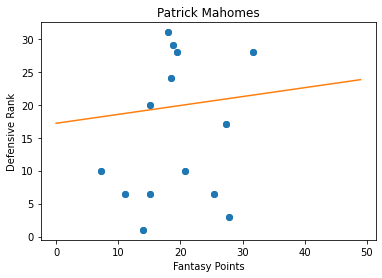

In [90]:
# A scatter plot showing the relationship between points scored and defense rank for Patrick Mahomes

xi = arange(0,50)
line = slope*xi+intercept

plt.scatter(player_df['Points'], player_df['Rank']);
plt.plot(player_df['Points'], player_df['Rank'],'o', xi, line);
plt.xlabel('Fantasy Points');
plt.ylabel('Defensive Rank');
plt.title('Patrick Mahomes');

The p-value that corresponds to t = 0.752 is 0.467, which is p-value > 0.05. This means that there is little to suggest a significant coorelation between the number of points Patrick Mahomes will score and the rank of the opposting defense. This plus the fact that Patrick Mahomes is a top fantasy player is good reason to start him for every game he is healthy.

## Step 5: Christian McCaffrey

In [91]:
christian_mccaffrey = weekly_df[weekly_df['Player'] == 'Christian McCaffrey']
pm_points_cm = christian_mccaffrey[points]
pm_op_rank_cm = christian_mccaffrey[op_rank]

In [92]:
pm_points_cm = pm_points_cm.transpose()
pm_points_cm = pm_points_cm.rename(columns = {39: 'Points'})
# reset index so it matches pm_op_rank
pm_points_cm.reset_index(drop=True, inplace=True)
pm_points_cm.head()

,Points
0,32.9
1,5.3
2,24.8
3,23.9
4,41.7


In [93]:
pm_op_rank_cm = pm_op_rank_cm.transpose()
pm_op_rank_cm = pm_op_rank_cm.rename(columns = {39: 'Rank'})
pm_op_rank_cm.reset_index(drop=True, inplace=True)
pm_op_rank_cm.head()

,Rank
0,21.0
1,1.0
2,13.0
3,20.0
4,31.0


In [94]:
# Merge rank and points table for player

player_cm = pm_op_rank_cm.join(pm_points_cm, how ='left')
player_cm.head()

,Rank,Points
0,21.0,32.9
1,1.0,5.3
2,13.0,24.8
3,20.0,23.9
4,31.0,41.7


In [95]:
player_cm['Rank']= player_cm['Rank'].astype(float)

In [96]:
player_cm['intercept'] = 1

lm = sms.OLS(player_cm['Points'].astype(float), player_cm[['intercept', 'Rank']], missing='drop')
results_cm = lm.fit()
results_cm.summary()

C:\Users\josch\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4.514
Date:                Tue, 28 Jun 2022   Prob (F-statistic):             0.0519
Time:                        13:16:49   Log-Likelihood:                -55.834
No. Observations:                  16   AIC:                             115.7
Df Residuals:                      14   BIC:                             117.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.4383      4.148      3.481      0.004       5.543      23.334
Rank           0.5008      0.236      2.125      0.052      -0.005       1.006
==============================================================================
Omnibus:                        0.743   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.690   Jarque-Bera (JB):                0.491
Skew:                          -0.398   Prob(JB):                        0.782
Kurtosis:                       2.681   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Get the intercept and slope

intercept_cm = results_cm.params[0]
slope_cm = results_cm.params[1]

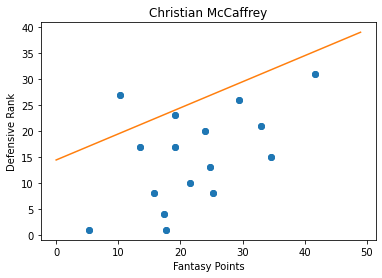

In [98]:
# A scatter plot showing the relationship between points scored and defense rank for Christian McCaffrey

xi_cm = arange(0,50)
line_cm = slope_cm*xi_cm+intercept_cm

plt.scatter(player_cm['Points'], player_cm['Rank']);
plt.plot(player_cm['Points'], player_cm['Rank'],'o', xi_cm, line_cm);
plt.xlabel('Fantasy Points');
plt.ylabel('Defensive Rank');
plt.title('Christian McCaffrey');

The p-value that corresponds to t = 2.125 is 0.052, which is p-value slightly greater than 0.05. This means that there is some evidence to suggest a coorelation between the number of points Christian McCaffrey will score and the rank of the opposing defense. However, in week 2 against the number 1 ranked defense, Christian McCaffrey only scored 5.3 points, which is far below his weekly average for the 2019 season. We cannot be certain if this was due to playing the number 1 ranked defense or if he was removed early from the game due to injury. Despite the slight correlation, Christian McCaffrey scored the most fantasy points of any running back in the 2019 season. A top defense may hold him to roughly 17 points, but this a still a great week for any fantasy player. For this reason, it is a good bet to start him every game he is healthy.

## Step 6: JuJu Smith-Schuster

In [99]:
juju_smith = weekly_df[weekly_df['Player'] == 'JuJu Smith-Schuster']
pm_points_jj = juju_smith[points]
pm_op_rank_jj = juju_smith[op_rank]

In [100]:
pm_points_jj = pm_points_jj.transpose()
pm_points_jj = pm_points_jj.rename(columns = {158: 'Points'})
# reset index so it matches pm_op_rank
pm_points_jj.reset_index(drop=True, inplace=True)
pm_points_jj.head()

,Points
0,7.8
1,8.4
2,14.1
3,1.5
4,11.5


In [101]:
pm_op_rank_jj = pm_op_rank_jj.transpose()
pm_op_rank_jj = pm_op_rank_jj.rename(columns = {158: 'Rank'})
pm_op_rank_jj.reset_index(drop=True, inplace=True)
pm_op_rank_jj.head()

,Rank
0,1.0
1,18.0
2,3.0
3,19.0
4,4.0


In [102]:
# Merge rank and points table for player

player_jj = pm_op_rank_jj.join(pm_points_jj, how ='left')
player_jj.head()

,Rank,Points
0,1.0,7.8
1,18.0,8.4
2,3.0,14.1
3,19.0,1.5
4,4.0,11.5


In [103]:
player_jj['Rank']= player_jj['Rank'].astype(float)

In [104]:
player_jj['intercept'] = 1

lm = sms.OLS(player_jj['Points'].astype(float), player_jj[['intercept', 'Rank']], missing='drop')
results_jj = lm.fit()
results_jj.summary()

C:\Users\josch\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.095
Method:                 Least Squares   F-statistic:                   0.04844
Date:                Tue, 28 Jun 2022   Prob (F-statistic):              0.830
Time:                        13:16:49   Log-Likelihood:                -37.268
No. Observations:                  12   AIC:                             78.54
Df Residuals:                      10   BIC:                             79.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.2145      2.942      1.772      0.107      -1.341      11.770
Rank           0.0413      0.188      0.220      0.830      -0.377       0.460
==============================================================================
Omnibus:                        2.579   Durbin-Watson:                   2.475
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.621
Skew:                           0.698   Prob(JB):                        0.445
Kurtosis:                       1.864   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Get the intercept and slope

intercept_jj = results_jj.params[0]
slope_jj = results_jj.params[1]

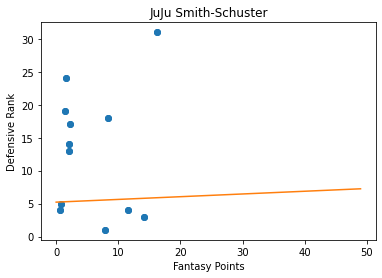

In [106]:
# A scatter plot showing the relationship between points scored and defense rank for JuJu Smith-Schuster

xi_jj = arange(0,50)
line_jj = slope_jj*xi_jj+intercept_jj

plt.scatter(player_jj['Points'], player_jj['Rank']);
plt.plot(player_jj['Points'], player_jj['Rank'],'o', xi_jj, line_jj);
plt.xlabel('Fantasy Points');
plt.ylabel('Defensive Rank');
plt.title('JuJu Smith-Schuster');

The p-value that corresponds to t = 0.220 is 0.830, which is p-value > 0.05. This means that there is no evidence to suggest a coorelation between the number of points JuJu Smith-Schuster will score and the rank of the opposing defense. The slope of the line is pretty flat suggesting that no matter the defense, JuJu isn't scoring too many points. For this reason, I suggest only starting JuJu Smith-Schuster in must start situations.

## Step 7: Summary

The first question we attempted to answer was draft order. We did this by grouping players by position and looking at the distribution. This was done for the year 2020 and for the previous ten year total. The second question we attempted to answer was how defensive rank affects points scored per player. This was done by taking fantasy points as the response or dependent variable and defensive rank is the explanatory or independent variable. We did a linear regression for three different players. This gave us some understanding of how the strength of an opposing defense affects these players. However, it is limited by a small sample size (16 games in a single season) and that fact that many other variables can affect the number of points a player will score (e.g. home vs. away, weather, injury).